# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
# include your Project 1 Decision Tree Model as well
from DT_Iman_Toussi import DecisionTreeModel

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [5]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

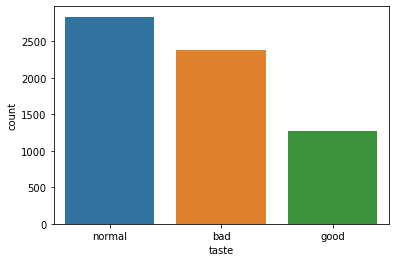

In [6]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

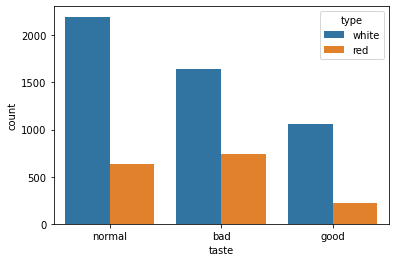

In [7]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

## 1.) EDA

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,7.215307,0.339657,0.318650,5.442659,0.056038,30.523853,115.745691,0.996135,0.531251,10.492156
std,1.296434,0.164625,0.145313,4.757664,0.035032,17.748427,56.517576,0.116587,0.148801,1.192964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.125000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


In [9]:
df.shape

(6498, 13)

In [10]:
df.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

### Remove missing data rows

In [11]:
df = df.dropna()

In [12]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

### Check and remove outliers

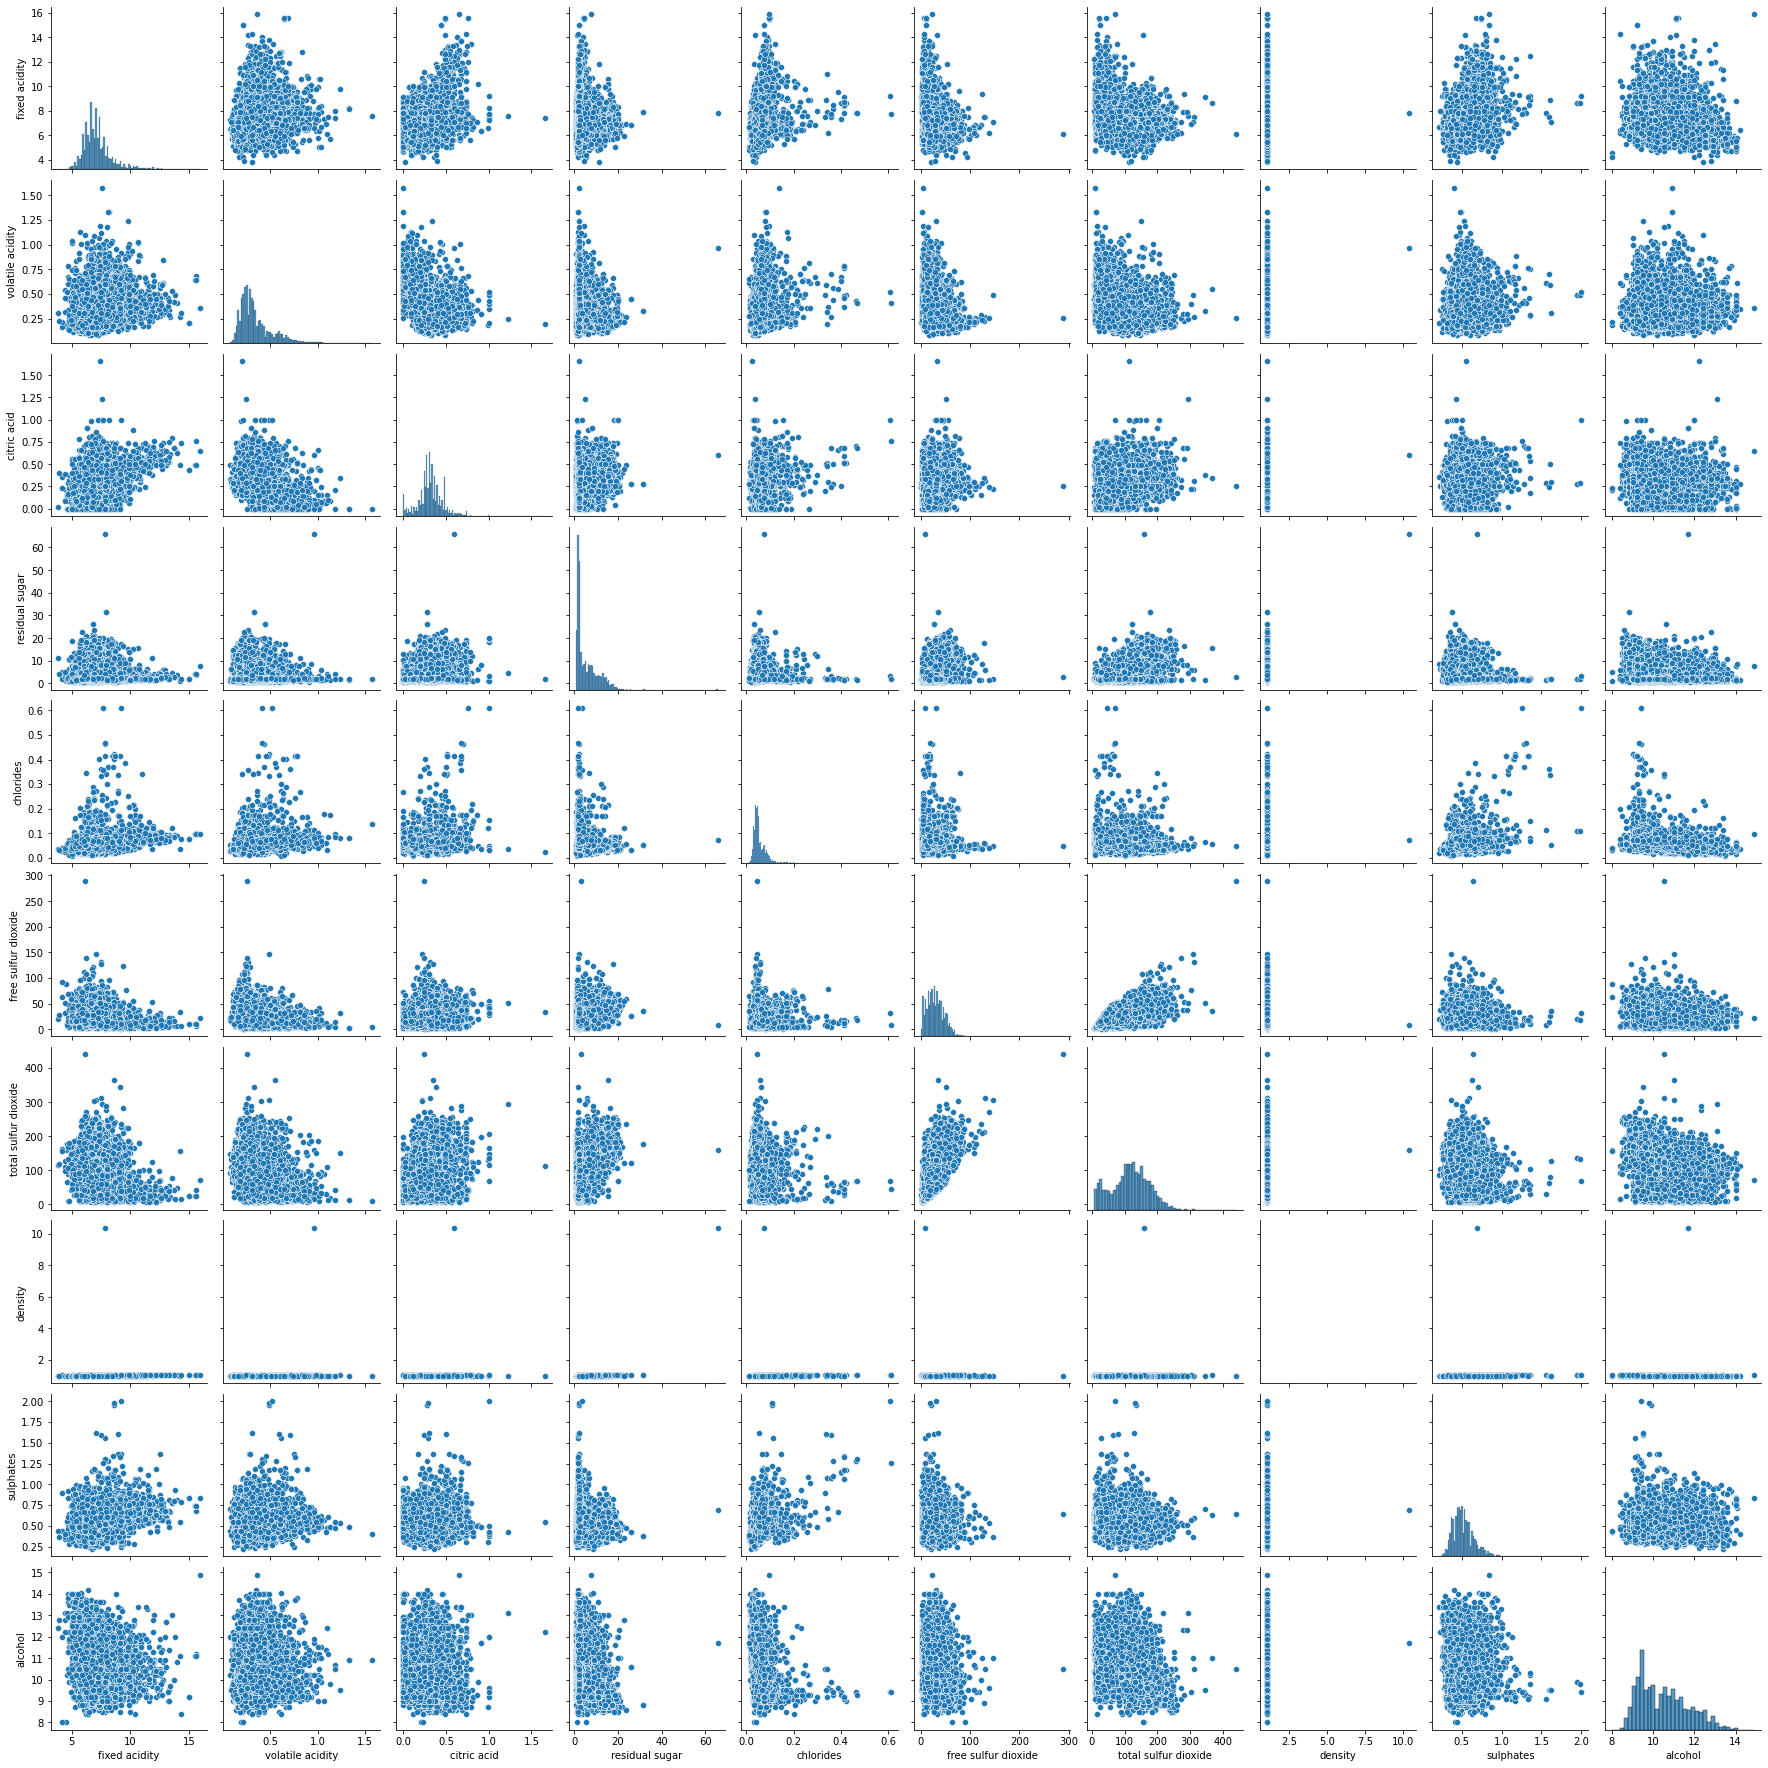

In [13]:
sns.pairplot(data = df)

<AxesSubplot:xlabel='density', ylabel='citric acid'>

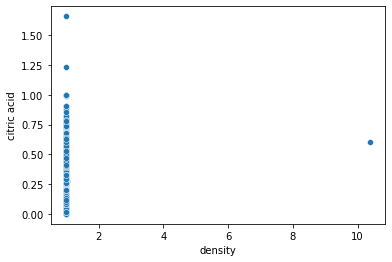

In [14]:
sns.scatterplot(x ='density', y='citric acid', data=df)

### There is an outlier for density that must be removed

In [15]:
df = df[df['density'] < 10]

<AxesSubplot:xlabel='density', ylabel='citric acid'>

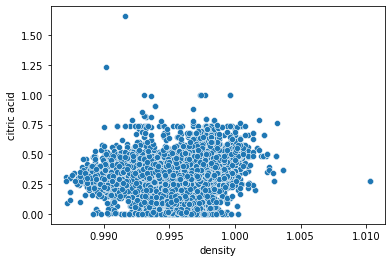

In [16]:
sns.scatterplot(x ='density', y='citric acid', data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='density'>

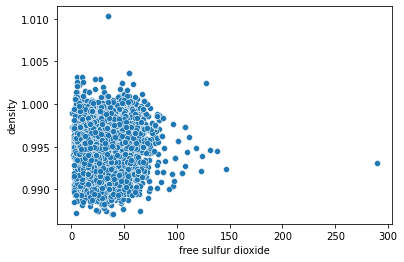

In [17]:
sns.scatterplot(x ='free sulfur dioxide', y='density', data=df)

### There is an outlier for free sulfur dioxide that must be removed

In [18]:
df = df[df['free sulfur dioxide'] < 250]

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='density'>

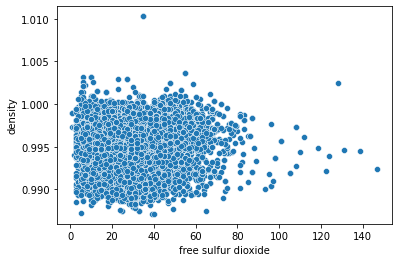

In [19]:
sns.scatterplot(x ='free sulfur dioxide', y='density', data=df)

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
fixed acidity,1.000000,0.218944,0.324362,-0.114369,0.298154,-0.285474,-0.329223,0.465745,0.299651,-0.095535
volatile acidity,0.218944,1.000000,-0.379693,-0.206276,0.377241,-0.357050,-0.416051,0.267452,0.225698,-0.038279
citric acid,0.324362,-0.379693,1.000000,0.140427,0.038839,0.136874,0.195992,0.093324,0.055957,-0.010799
residual sugar,-0.114369,-0.206276,0.140427,1.000000,-0.131610,0.418628,0.501973,0.539397,-0.190352,-0.365992
chlorides,0.298154,0.377241,0.038839,-0.131610,1.000000,-0.197650,-0.280196,0.367670,0.395599,-0.257022
free sulfur dioxide,-0.285474,-0.357050,0.136874,0.418628,-0.197650,1.000000,0.722035,0.030785,-0.193115,-0.182701
total sulfur dioxide,-0.329223,-0.416051,0.195992,0.501973,-0.280196,0.722035,1.000000,0.031688,-0.277253,-0.266578
density,0.465745,0.267452,0.093324,0.539397,0.367670,0.030785,0.031688,1.000000,0.261579,-0.700986
sulphates,0.299651,0.225698,0.055957,-0.190352,0.395599,-0.193115,-0.277253,0.261579,1.000000,-0.003197
alcohol,-0.095535,-0.038279,-0.010799,-0.365992,-0.257022,-0.182701,-0.266578,-0.700986,-0.003197,1.000000


### reset index

In [21]:
df = df.reset_index()
df.tail()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
6490,6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,red,midly acidic,bad
6491,6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,red,midly acidic,normal
6492,6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,red,midly acidic,normal
6493,6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,red,midly acidic,bad
6494,6497,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,0.66,11.0,red,quite acidic,normal


## 2.) Setup dummy variables for categorical variables

In [22]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [23]:
df['pHValue'].unique()

array(['very acidic', 'quite acidic', 'extremly acidic', 'midly acidic',
       'acidic', 'lightly acidic'], dtype=object)

In [24]:
df['taste'].unique()

array(['normal', 'bad', 'good'], dtype=object)

### Now, we create dummy variables for the above categorical variables

In [25]:
df_dummies = pd.get_dummies(df, columns = ['type', 'pHValue', 'taste'])

In [26]:
df_dummies.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,...,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,taste_bad,taste_good,taste_normal
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,...,1,0,0,0,0,0,1,0,0,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,...,1,0,0,0,0,1,0,0,0,1
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,...,1,0,0,0,0,1,0,0,0,1
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,...,1,0,0,0,0,0,1,0,0,1
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,...,1,0,0,0,0,0,1,0,0,1


### deal with the 'good' values of taste

In [27]:
df['taste_good'] = df['taste'].apply(lambda x: 1 if x == 'taste_good' else 0)

In [28]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
categorical_features = ['type', 'pHValue', 'taste']

In [29]:
numerical_df = df[numerical_features + ['taste_good']]

## 3.) Separate data set into training and testing

In [27]:
df_dummies.corr()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,...,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,taste_bad,taste_good,taste_normal
index,1.000000,0.246827,0.488407,-0.223172,-0.259495,0.356644,-0.363024,-0.598139,0.175603,0.359147,...,-0.746197,0.051466,-0.062751,0.013335,0.115132,0.087573,-0.143490,0.043634,-0.069130,0.012995
fixed acidity,0.246827,1.000000,0.218944,0.324362,-0.114369,0.298154,-0.285474,-0.329223,0.465745,0.299651,...,-0.486764,-0.110103,0.115290,-0.052481,-0.145294,-0.061052,0.126447,0.067597,-0.049484,-0.026036
volatile acidity,0.488407,0.218944,1.000000,-0.379693,-0.206276,0.377241,-0.357050,-0.416051,0.267452,0.225698,...,-0.654099,0.065555,-0.106524,0.024254,0.176548,0.074517,-0.151852,0.267939,-0.151638,-0.138862
citric acid,-0.223172,0.324362,-0.379693,1.000000,0.140427,0.038839,0.136874,0.195992,0.093324,0.055957,...,0.187334,-0.111843,0.112443,-0.039810,-0.220909,-0.084791,0.200619,-0.075453,0.054575,0.029590
residual sugar,-0.259495,-0.114369,-0.206276,0.140427,1.000000,-0.131610,0.418628,0.501973,0.539397,-0.190352,...,0.352168,-0.064461,0.131643,-0.027271,-0.146730,-0.132411,0.176933,0.034516,-0.063866,0.017638
chlorides,0.356644,0.298154,0.377241,0.038839,-0.131610,1.000000,-0.197650,-0.280196,0.367670,0.395599,...,-0.512739,0.019114,-0.025511,-0.010312,0.039435,0.003225,-0.019506,0.182057,-0.161772,-0.047282
free sulfur dioxide,-0.363024,-0.285474,-0.357050,0.136874,0.418628,-0.197650,1.000000,0.722035,0.030785,-0.193115,...,0.478433,-0.033032,0.021553,-0.015744,-0.085980,-0.095304,0.149500,-0.048729,0.016046,0.034496
total sulfur dioxide,-0.598139,-0.329223,-0.416051,0.195992,0.501973,-0.280196,0.722035,1.000000,0.031688,-0.277253,...,0.701632,-0.055557,0.047448,-0.013228,-0.155940,-0.119712,0.211385,0.046646,-0.050862,-0.004570
density,0.175603,0.465745,0.267452,0.093324,0.539397,0.367670,0.030785,0.031688,1.000000,0.261579,...,-0.398677,0.009662,0.007432,-0.014195,0.030841,-0.025916,0.000506,0.275429,-0.279098,-0.044000
sulphates,0.359147,0.299651,0.225698,0.055957,-0.190352,0.395599,-0.193115,-0.277253,0.261579,1.000000,...,-0.487463,0.084907,-0.076027,0.009150,0.111682,0.074427,-0.129019,-0.035841,0.034113,0.007492


In [32]:
X = df_dummies.drop('taste_good', axis='columns')
Y = df_dummies['taste_good']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

## 4.) Build models and check their model performance

### Build a logistic regression first

In [33]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [34]:
predictions = model1.predict(X_test)

In [35]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1071
           1       0.87      0.82      0.84       228

    accuracy                           0.95      1299
   macro avg       0.92      0.90      0.91      1299
weighted avg       0.95      0.95      0.95      1299

0.9468822170900693


### With logistic regression, we get an f1-score of 84%!

### Building a decision tree

In [54]:
tree_df = df[['taste', 'type', 'alcohol']]
tree_df['taste'] = df_dummies['taste_good'].apply(lambda x: 'taste_good' if x == 1 else 'not_good')
tree_df['type'] = df['type'].apply(lambda x: 1 if x == 'white' else 0)

In [55]:
tree_df

,taste,type,alcohol
0,not_good,1,8.8
1,not_good,1,9.5
2,not_good,1,10.1
3,not_good,1,9.9
4,not_good,1,9.9
...,...,...,...
6490,not_good,0,10.5
6491,not_good,0,11.2
6492,not_good,0,11.0
6493,not_good,0,10.2


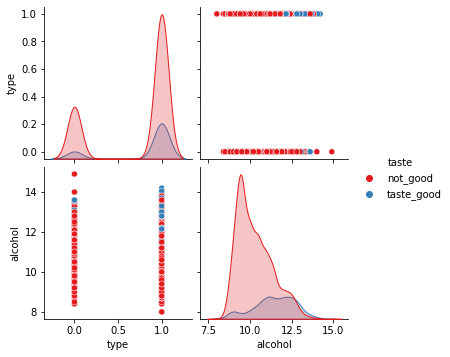

In [56]:
sns.pairplot(tree_df, hue='taste',palette='Set1')

In [62]:
features = tree_df.drop('taste', axis=1).columns

In [63]:
X = tree_df.drop('taste', axis=1)
Y = tree_df['taste']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [64]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
predictions = model2.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[1499   55]
 [ 317   78]]
              precision    recall  f1-score   support

    not_good       0.83      0.96      0.89      1554
  taste_good       0.59      0.20      0.30       395

    accuracy                           0.81      1949
   macro avg       0.71      0.58      0.59      1949
weighted avg       0.78      0.81      0.77      1949

0.8091328886608518


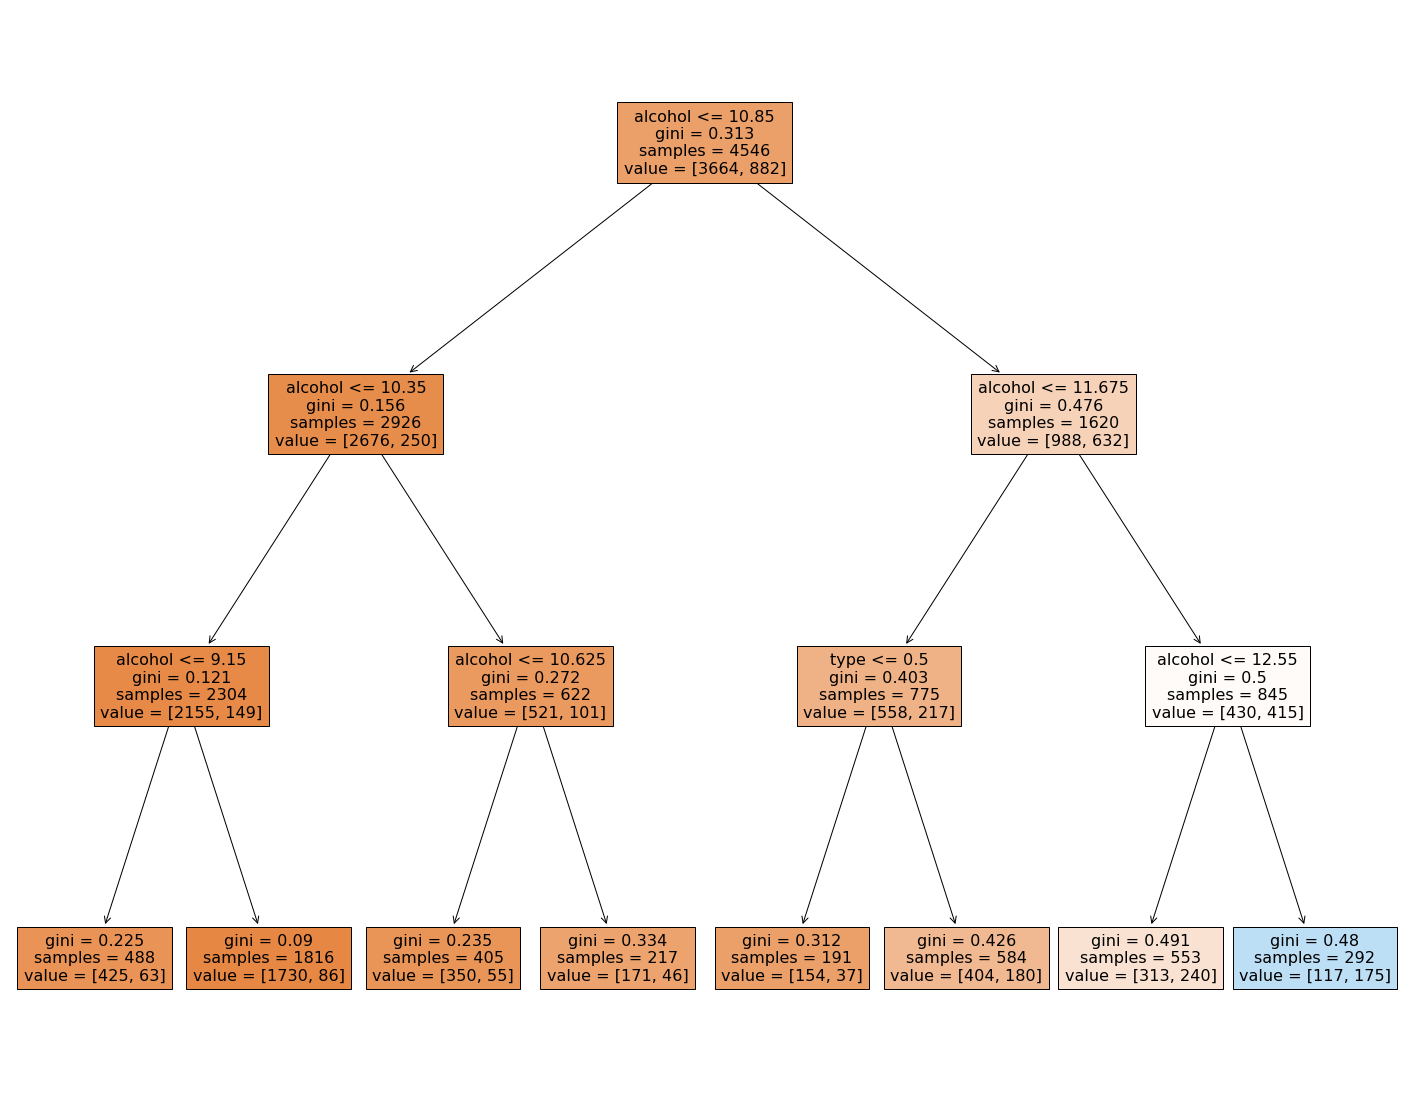

In [66]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, feature_names = features, filled=True)

### With decision tree, we get an f1-score of 30%

### Building a random forest

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [70]:
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))

              precision    recall  f1-score   support

    not_good       0.83      0.97      0.89      1554
  taste_good       0.60      0.20      0.30       395

    accuracy                           0.81      1949
   macro avg       0.71      0.58      0.60      1949
weighted avg       0.78      0.81      0.77      1949

0.8106721395587481


### Similarly with the decision tree, the random forest gives us an f1-score of 30%

## 5.) Make an ensemble model

### We will make a bagging ensemble

In [73]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=101), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)

In [75]:
print(accuracy_score(Y_test, Y_pred))

0.8086198050282196


In [78]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    not_good       0.83      0.96      0.89      1554
  taste_good       0.58      0.21      0.31       395

    accuracy                           0.81      1949
   macro avg       0.70      0.59      0.60      1949
weighted avg       0.78      0.81      0.77      1949



### The bagging ensemble method shows a slight improvement to the f1-score to 31%

## 6.) Questions

 - Identify out of all those you have tried, which one is the best model

### Out of all of the models, logistic regression turned out to have the best f1-scores of 84% while both the decision tree and random forest had an f1-score of 30%. Even the bagging ensemble was not able to come close to the logistic regression score.

- For the best fitted model, does it work better for the Red wine or White wine or similar?

<AxesSubplot:xlabel='taste', ylabel='count'>

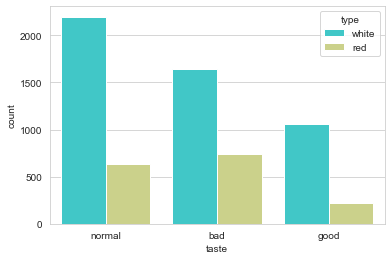

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='taste',hue='type',data=df,palette='rainbow')

In [82]:
df = df_dummies

<AxesSubplot:xlabel='taste_good', ylabel='count'>

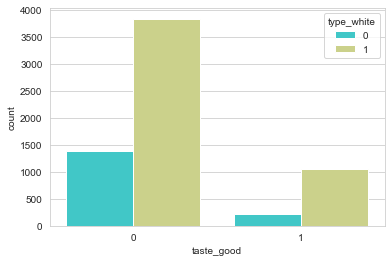

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='taste_good',hue='type_white',data=df,palette='rainbow')

In [89]:
X = df_dummies.drop('type_white', axis='columns')
Y = df_dummies['type_white']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

In [90]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       312
           1       0.99      1.00      0.99       987

    accuracy                           0.99      1299
   macro avg       0.99      0.99      0.99      1299
weighted avg       0.99      0.99      0.99      1299

0.9923017705927637


<AxesSubplot:xlabel='taste_good', ylabel='count'>

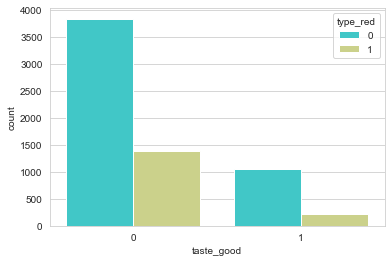

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='taste_good',hue='type_red',data=df,palette='rainbow')

In [91]:
X = df_dummies.drop('type_red', axis='columns')
Y = df_dummies['type_red']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

In [92]:
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       987
           1       0.99      0.98      0.99       312

    accuracy                           0.99      1299
   macro avg       0.99      0.99      0.99      1299
weighted avg       0.99      0.99      0.99      1299

0.993841416474211


### The logistic regression model works similarly for both the red and white wines

 - Can ensemble methods improve your models?

### As seen from the bagging ensemble above, ensemble method will improve the models. However, it will only improve them by a very little amount

 - Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

### The categorical variable pH Value is not important when considering the taste of a wine. If there is an instance of a pH Value that is missing, the best option would to be to give it a normalized value.